### 1. Defining the Question

##### a) Specifying the Question

>  To build a model that determines whether sypmtoms of a patient suggest that the patient has hypothyroidism.

##### b) Defining the Metric for Success

> Our model having an accuracy above 90%.

##### c) Understanding the Context

> Hypothyroidism (underactive thyroid) is a condition in which your thyroid gland doesn't produce enough of certain crucial hormones.

> Hypothyroidism may not cause noticeable symptoms in the early stages. Over time, untreated hypothyroidism can cause a number of health problems, such as obesity, joint pain, infertility and heart disease.

> Accurate thyroid function tests are available to diagnose hypothyroidism. Treatment with synthetic thyroid hormone is usually simple, safe and effective once you and your doctor find the right dose for you.

> Hypothyroidism signs and symptoms may include:

* Fatigue
* Increased sensitivity to cold
* Constipation
* Dry skin
* Weight gain
* Puffy face
* Hoarseness
* Muscle weakness
* Elevated blood cholesterol level

##### d) Recording the Experimental Design

Application of techniques such as exploratory data analysis, such as Univariate, Bivariate, in this study to determine the relationships and differences between different variables. We shall also use Decision Trees and Support Vector Machine to make predictions.



##### e) Data Relevance

The dataset to use for this project can be found by following this link: https://bit.ly/hypothyroid_data and is trusted to be genuine

### 2. Reading Data

In [193]:
# let's import the libraries we need
from warnings import filterwarnings
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image
import pydotplus
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, f1_score, precision_score, recall_score, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from scipy.stats import bartlett
from scipy.stats import levene
from scipy.stats import shapiro
from scipy.stats import normaltest
filterwarnings('ignore')
%matplotlib inline

##### *a) Reading the Data*

In [24]:
# let's import the dataset
Hypothyroid = pd.read_csv('hypothyroid.csv')

##### *b) Checking the Data*

In [25]:
# let's check the top 5 rows of the dataset
Hypothyroid.head()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
0,hypothyroid,72,M,f,f,f,f,f,f,f,...,y,0.60,y,15,y,1.48,y,10,n,?
1,hypothyroid,15,F,t,f,f,f,f,f,f,...,y,1.70,y,19,y,1.13,y,17,n,?
2,hypothyroid,24,M,f,f,f,f,f,f,f,...,y,0.20,y,4,y,1,y,0,n,?
3,hypothyroid,24,F,f,f,f,f,f,f,f,...,y,0.40,y,6,y,1.04,y,6,n,?
4,hypothyroid,77,M,f,f,f,f,f,f,f,...,y,1.20,y,57,y,1.28,y,44,n,?


In [26]:
# let's preview the bottom 5 rows of the dataset
Hypothyroid.tail()

,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG
3158,negative,58,F,f,f,f,f,f,f,f,...,y,1.70,y,86,y,0.91,y,95,n,?
3159,negative,29,F,f,f,f,f,f,f,f,...,y,1.80,y,99,y,1.01,y,98,n,?
3160,negative,77,M,f,f,f,f,f,f,f,...,y,0.60,y,71,y,0.68,y,104,n,?
3161,negative,74,F,f,f,f,f,f,f,f,...,y,0.10,y,65,y,0.48,y,137,n,?
3162,negative,56,F,t,f,f,f,f,f,f,...,y,1.80,y,139,y,0.97,y,143,n,?


In [27]:
# let's check the shape of the dataset
print('The dataset has {} rows and {} columns'.format(Hypothyroid.shape[0], Hypothyroid.shape[1]))

The dataset has 3163 rows and 26 columns


In [28]:
# let's see information about the dataframe
Hypothyroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3163 entries, 0 to 3162
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   status                     3163 non-null   object
 1   age                        3163 non-null   object
 2   sex                        3163 non-null   object
 3   on_thyroxine               3163 non-null   object
 4   query_on_thyroxine         3163 non-null   object
 5   on_antithyroid_medication  3163 non-null   object
 6   thyroid_surgery            3163 non-null   object
 7   query_hypothyroid          3163 non-null   object
 8   query_hyperthyroid         3163 non-null   object
 9   pregnant                   3163 non-null   object
 10  sick                       3163 non-null   object
 11  tumor                      3163 non-null   object
 12  lithium                    3163 non-null   object
 13  goitre                     3163 non-null   object
 14  TSH_meas

In [29]:
# let's check the data types of the columns
Hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
TBG                          object
dtype: object

### 3. External Data Sources Validation

### 4. Tidying the Dataframe

In [30]:
# let's see the columns
Hypothyroid.columns

Index(['status', 'age', 'sex', 'on_thyroxine', 'query_on_thyroxine',
       'on_antithyroid_medication', 'thyroid_surgery', 'query_hypothyroid',
       'query_hyperthyroid', 'pregnant', 'sick', 'tumor', 'lithium', 'goitre',
       'TSH_measured', 'TSH', 'T3_measured', 'T3', 'TT4_measured', 'TT4',
       'T4U_measured', 'T4U', 'FTI_measured', 'FTI', 'TBG_measured', 'TBG'],
      dtype='object')

In [31]:
# let's replace all ? with NaN in the dataset
Hypothyroid.replace('?', np.nan, inplace=True)

In [33]:
mising_columns = []
for i, col in enumerate(Hypothyroid.columns):
  missing = (Hypothyroid[col].isnull().sum()/Hypothyroid.shape[0])*100
  if missing > 0:
    mising_columns.append(col)
  print(
      f'{i+1}. {col} = {(Hypothyroid[col].isnull().sum()/Hypothyroid.shape[0])*100}%')


1. status = 0.0%
2. age = 14.1005374644325%
3. sex = 2.3079355042681002%
4. on_thyroxine = 0.0%
5. query_on_thyroxine = 0.0%
6. on_antithyroid_medication = 0.0%
7. thyroid_surgery = 0.0%
8. query_hypothyroid = 0.0%
9. query_hyperthyroid = 0.0%
10. pregnant = 0.0%
11. sick = 0.0%
12. tumor = 0.0%
13. lithium = 0.0%
14. goitre = 0.0%
15. TSH_measured = 0.0%
16. TSH = 14.796079671198228%
17. T3_measured = 0.0%
18. T3 = 21.97281062282643%
19. TT4_measured = 0.0%
20. TT4 = 7.872273158393931%
21. T4U_measured = 0.0%
22. T4U = 7.840657603540942%
23. FTI_measured = 0.0%
24. FTI = 7.809042048687955%
25. TBG_measured = 0.0%
26. TBG = 91.77995573822321%


In [34]:
# let's drop TBG
Hypothyroid.drop(['TBG'], axis=1, inplace=True)

> We dropped the TBG column because it had 92% missing values.

> We will foward fill the missing values in the other columns.

In [35]:
# let's check the data types of the columns
Hypothyroid.dtypes

status                       object
age                          object
sex                          object
on_thyroxine                 object
query_on_thyroxine           object
on_antithyroid_medication    object
thyroid_surgery              object
query_hypothyroid            object
query_hyperthyroid           object
pregnant                     object
sick                         object
tumor                        object
lithium                      object
goitre                       object
TSH_measured                 object
TSH                          object
T3_measured                  object
T3                           object
TT4_measured                 object
TT4                          object
T4U_measured                 object
T4U                          object
FTI_measured                 object
FTI                          object
TBG_measured                 object
dtype: object

In [36]:
# let's foward fill the missing values in the dataset
Hypothyroid.fillna(method='ffill', inplace=True)

# check for missing values
Hypothyroid.isnull().sum().any

<bound method NDFrame._add_numeric_operations.<locals>.any of status                       0
age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
thyroid_surgery              0
query_hypothyroid            0
query_hyperthyroid           0
pregnant                     0
sick                         0
tumor                        0
lithium                      0
goitre                       0
TSH_measured                 0
TSH                          0
T3_measured                  0
T3                           0
TT4_measured                 0
TT4                          0
T4U_measured                 0
T4U                          0
FTI_measured                 0
FTI                          0
TBG_measured                 0
dtype: int64>

In [37]:
# let's change the datatypes of the columns using a dictionary
Hypothyroid = Hypothyroid.astype({'status': 'object',
                                  'age': 'int64',
                                  'sex': 'object',
                                  'on_thyroxine': 'object',
                                  'query_on_thyroxine': 'object',
                                  'on_antithyroid_medication': 'object',
                                  'thyroid_surgery': 'object',
                                  'query_hypothyroid': 'object',
                                  'query_hyperthyroid': 'object',
                                  'lithium': 'object',
                                  'goitre': 'object',
                                  'tumor': 'object',
                                  'TSH_measured': 'object',
                                  'TSH': 'float64',
                                  'T3_measured': 'object',
                                  'T3': 'float64',
                                  'TT4_measured': 'object',
                                  'TT4': 'float64',
                                  'T4U_measured': 'object',
                                  'T4U': 'float64',
                                  'FTI_measured': 'object',
                                  'FTI': 'float64',
                                  'TBG_measured': 'object'})


In [38]:
# let's check the data types of the columns
Hypothyroid.dtypes

status                        object
age                            int64
sex                           object
on_thyroxine                  object
query_on_thyroxine            object
on_antithyroid_medication     object
thyroid_surgery               object
query_hypothyroid             object
query_hyperthyroid            object
pregnant                      object
sick                          object
tumor                         object
lithium                       object
goitre                        object
TSH_measured                  object
TSH                          float64
T3_measured                   object
T3                           float64
TT4_measured                  object
TT4                          float64
T4U_measured                  object
T4U                          float64
FTI_measured                  object
FTI                          float64
TBG_measured                  object
dtype: object

In [39]:
# let's check for duplicates in the dataframe
Hypothyroid.duplicated().sum().any()

True

In [40]:
# let's drop all the duplicates
Hypothyroid.drop_duplicates(inplace=True)

In [41]:
# let's check for duplicates in the dataframe
Hypothyroid.duplicated().sum().any()

False

In [42]:
# let's create a function that checks for the percentage of outliers in a dataset using Interquartile range

def check_outliers(df):
    
    # instantiate the quantile variables

    Quantile_1, Quantile_2, Quantile_3 = 0, 0, 0

    # converting to dataframe

    check_outliers = pd.DataFrame()

    # let's get the numerical columns

    num_cols = df.select_dtypes(include=['int64', 'float64'])

    # getting the quantiles from the numerical columns

    Quantile_1 = num_cols.quantile(0.25)

    Quantile_3 = num_cols.quantile(0.75)

    # let's get the IQR

    IQR = Quantile_3 - Quantile_1

    # let's get the outliers

    check_outliers = num_cols[((num_cols < (
        Quantile_1 - 1.5 * IQR)) | (num_cols > (Quantile_3 + 1.5 * IQR))).any(axis=1)]

    # printing the number of outliers and the percentage of outliers

    print('There are {} outliers in the dataset.'.format(
        check_outliers.shape[0]))

    print('The percentage of outliers in the dataset is {}%.'.format(
        round((check_outliers.shape[0] / df.shape[0]) * 100, 2)))


In [43]:
# let's check the outliers in the dataset
check_outliers(Hypothyroid)

There are 820 outliers in the dataset.
The percentage of outliers in the dataset is 26.39%.


> We will use standardization to normalize the data as the outliers are significant.

### 5. Descriptive Data Analysis

##### *Functions to be used in Descriptive Analysis*

In [51]:
# let's create a function for categorical data
def check_categorical(column, rot, df):
    fig,ax = plt.subplots(figsize=(10,5))
    sns.countplot(df[column], orient='v')
    plt.xticks(rotation=rot)
    plt.title('Bar plot of {}'.format(column))
    plt.xlabel('{}'.format(column))
    plt.ylabel('Count')
    plt.show()

In [59]:
# let's create a function for numerical data
def check_numerical(column, df):
    fig, ax = plt.subplots(1,2, figsize = (10,5))
    #i) Distribution plot for outliers
    sns.distplot(df[column], hist=True, ax=ax[0])
    ax[0].set_title('Distribution Plot of {}'.format(column))
    ax[0].set_xlabel('{}'.format(column))
    ax[0].set_ylabel('Count')
    #ii) Box plot for outliers
    sns.boxplot(df[column], ax=ax[1])
    ax[1].set_title('Box Plot of {}'.format(column))
    ax[1].set_xlabel('{}'.format(column))
    ax[1].set_ylabel('Count')
    plt.show()

In [101]:
# a function to calculate pearson correlation
def pearson_correlation(x, y, df):
    corr = df[[x, y]].corr()
    print('The Pearson correlation between {} and {} is {}'.format(x, y, corr.iloc[0,1]))

In [108]:
# a function to plot a bar chart
def bar_plot(x, y, df):
    fig, ax = plt.subplots(figsize=(10,5))
    sns.barplot(df[x], df[y])
    plt.title('Bar plot of {} vs {}'.format(x, y))
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))
    plt.show()

In [102]:
# let's create a crosstab function for bivariate analysis
def crosstab(x, y, rot, df):
    graph = pd.crosstab(df[x], df[y])
    graph.plot.bar(stacked = True)
    plt.xticks(rotation=rot)
    plt.title('Bar plot of {} vs {}'.format(x, y))
    plt.xlabel('{}'.format(x))
    plt.ylabel('{}'.format(y))
    plt.show()

In [103]:
# let's create a function to create a pairplot
def pairplot(df):
    columns = df.columns.values
    plot = sns.pairplot(df, vars=columns, palette='Set1')
    plot.fig.suptitle(f'Pairplot of {columns[0]} vs {columns[1]}')
    plt.show()
    pearson_correlation(columns[0], columns[1], df)


##### *a) Univariate Analysis*

In [60]:
# let's select all the categorical columns
categorical_columns = Hypothyroid.select_dtypes(include=['object']).columns.to_list()
categorical_columns

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

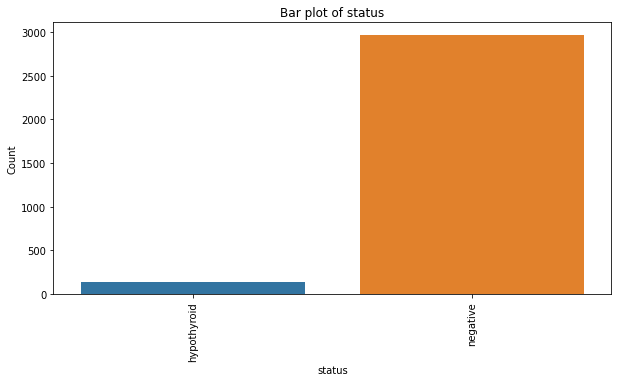

In [61]:
# let's check the status of a person
check_categorical(categorical_columns[0], 90, Hypothyroid)

> From the survey, most people did not have hypothyroidism.

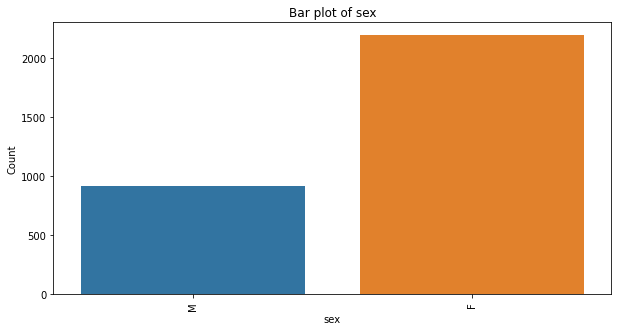

In [62]:
# let's check the gender of a person
check_categorical(categorical_columns[1], 90, Hypothyroid)


> More females have a higher occurence of hypothyroidism.

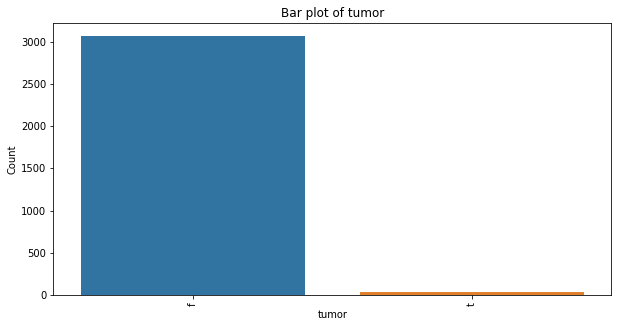

In [63]:
# let's check if hypothyroid patients had a tumor
check_categorical(categorical_columns[10], 90, Hypothyroid)

> Most Hypothyroid patients did not have a tumor.

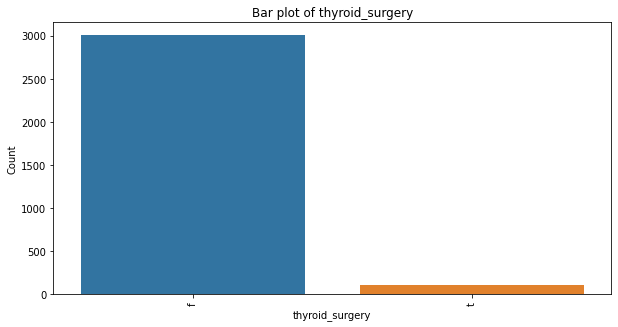

In [64]:
# let's see if the patients had gone for thyroid surgery
check_categorical(categorical_columns[5], 90, Hypothyroid)

> Most hypothyroid patients had not gone for thyroid surgery.

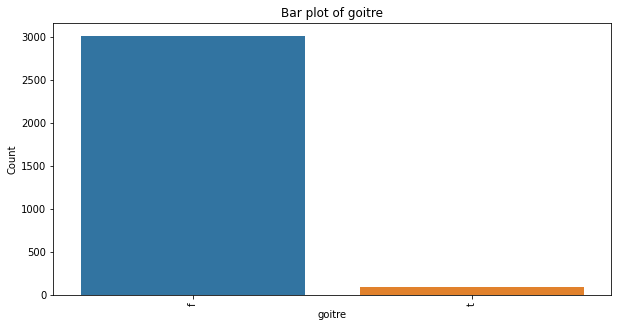

In [65]:
# let's check if a patient had a goitre
check_categorical(categorical_columns[12], 90, Hypothyroid)

> Most patients did not have goitre.

In [66]:
# let's select all numerical columns
numerical_columns = Hypothyroid.select_dtypes(exclude=['object']).columns.to_list()
numerical_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

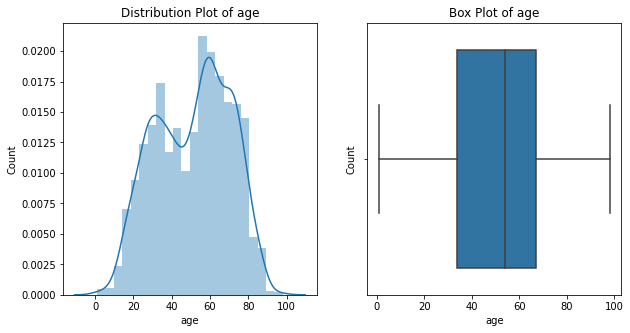

In [67]:
# let's check the distribution of the age
check_numerical(numerical_columns[0], Hypothyroid)

> Age does not have outliers.

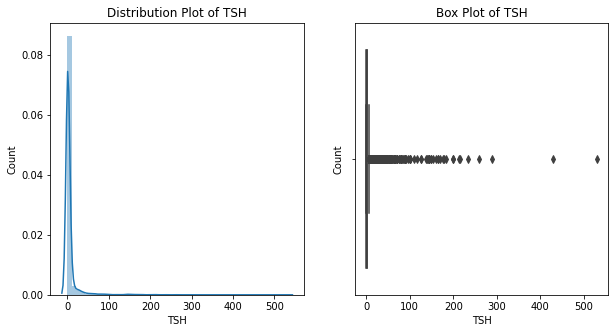

In [68]:
# let's check the distribution of the TSH
check_numerical(numerical_columns[1], Hypothyroid)

> TSH has outliers. This is a sign of hyperthyroidism as TSH values fall between 0.4 and 4.

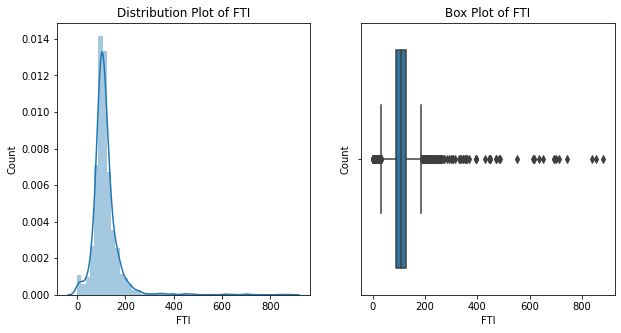

In [69]:
# let's check the distribution of the FTI
check_numerical(numerical_columns[5], Hypothyroid)

The FTI column has outliers. 

##### *b) Bivariate Analysis*

In [71]:
# let's see our categorical columns
categorical_columns

['status',
 'sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

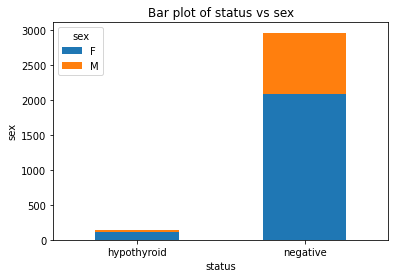

In [72]:
#### CATEGORICAL-CATEGORICAL #####

# let's plot the crosstab for status and sex
crosstab(categorical_columns[0], categorical_columns[1], 0, Hypothyroid)

> From the plot, more females than males were affected by hypothyroid.

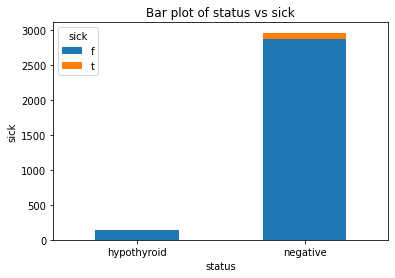

In [73]:
# let's plot a crosstab of status against sickness levels
crosstab(categorical_columns[0], categorical_columns[9], 0, Hypothyroid)

> From the plot, those who had hypothyroidsm were not sick

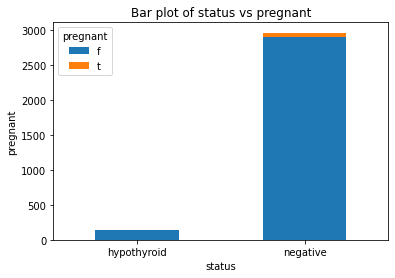

In [75]:
# let's plot a crosstab of status against pregnancy
crosstab(categorical_columns[0], categorical_columns[8], 0, Hypothyroid)

> Of everyone affected by hypothyroidism, no one was sick.

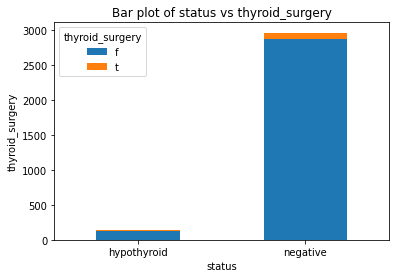

In [76]:
# let's plot a crosstab of status against surgery
crosstab(categorical_columns[0], categorical_columns[5], 0, Hypothyroid)

> Very few people who had gone through thyroid surgery had a thyroidism.

In [80]:
#### NUMERICAL-NUMERICAL #####

# let's view the numerical columns
numerical_columns

['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

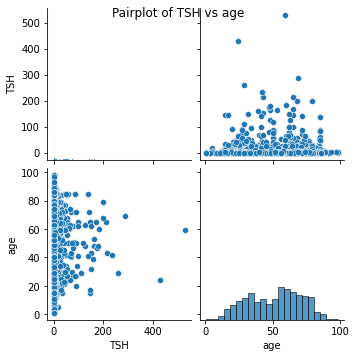

The Pearson correlation between TSH and age is 0.003134085056545363


In [104]:
# let's create a pairplot for tsh against age
pairplot(Hypothyroid[['TSH', 'age']])

> There is a weak positive correlation between TSH and age.

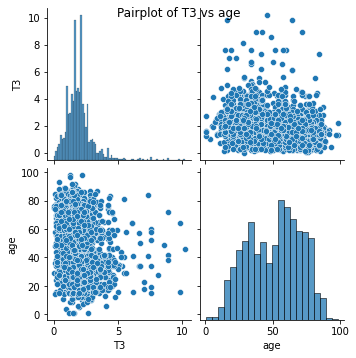

The Pearson correlation between T3 and age is -0.22380505105098628


In [105]:
# let's create a pairplot for age against T3
pairplot(Hypothyroid[['T3', 'age']])

> There is a weak negative correlation between T3 and age.

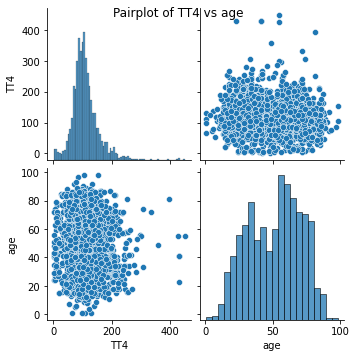

The Pearson correlation between TT4 and age is -0.08635907477949313


In [106]:
# let's plot a pairplot for TT4 against age
pairplot(Hypothyroid[['TT4', 'age']])

> There us a weak negative correlation btween TT4 and age

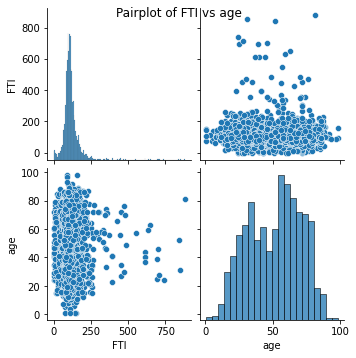

The Pearson correlation between FTI and age is 0.0007893782774058232


In [107]:
# let's plot a pairplot for FTI against age
pairplot(Hypothyroid[['FTI', 'age']])

> There is a weak positive correlation between FTI and age.

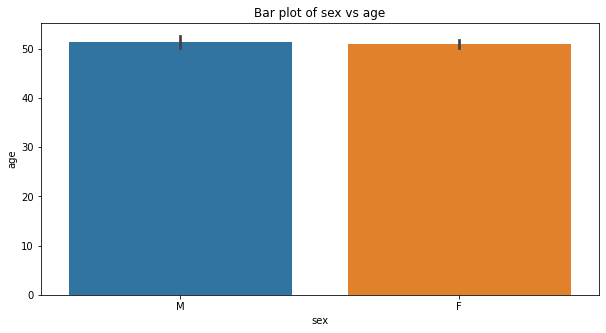

In [109]:
##### CATEGORICAL-NUMERICAL #####

# let's plot a bar plot sex vs age
bar_plot('sex', 'age', Hypothyroid)

> Victims had similar age

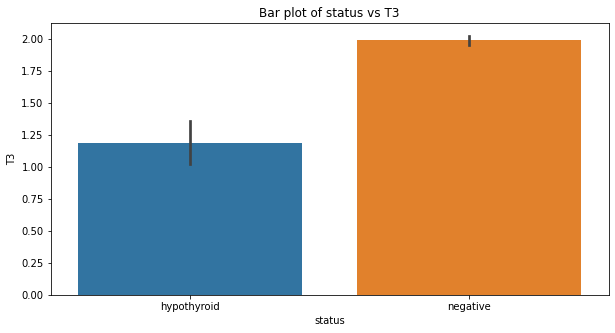

In [110]:
# status against T3 levels barplot
bar_plot('status', 'T3', Hypothyroid)

> Hypothyroid patients had lower T3 levels

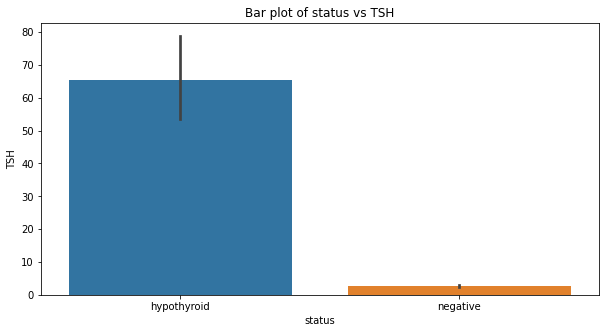

In [111]:
# barplot of status against tsh
bar_plot('status', 'TSH', Hypothyroid)

> There were high TSH levels amongstn Hypothyroid patients.

##### *c) Multivariate Analysis*

Text(0.5, 1.0, 'Correlation Heatmap')

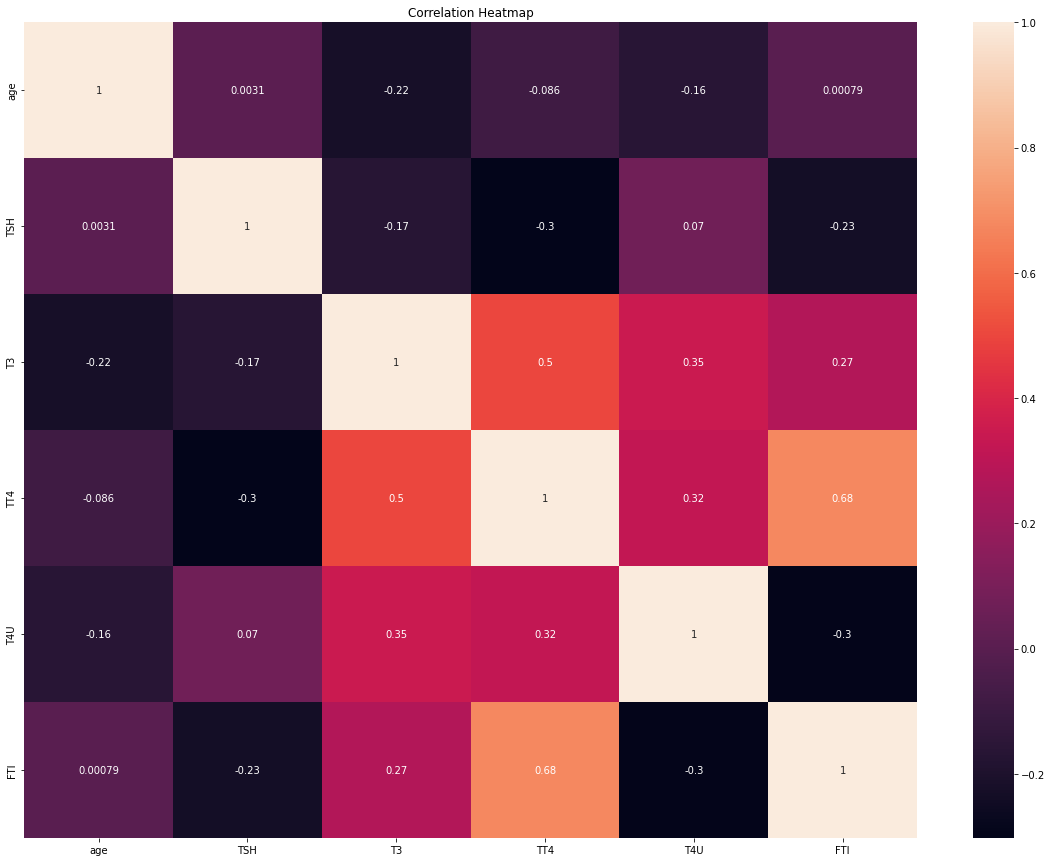

In [118]:
# let's plot a heatmap of the variables
fig, ax = plt.subplots(figsize = (20,15))
sns.heatmap(Hypothyroid.corr(), annot=True)
plt.title('Correlation Heatmap')

### VIF 

##### *Function to calculate VIF*

In [119]:
# let's create a function to calculate the VIF score
def vif_score(df):
    correlation = df.corr()
    inv_corr = pd.DataFrame(np.linalg.inv(correlation.values), index=correlation.columns, columns=correlation.columns)
    return inv_corr

In [120]:
# let's get the vif for our dataframe
vif_score(Hypothyroid)

,age,TSH,T3,TT4,T4U,FTI
age,1.065236,0.006379,0.225832,-0.092516,0.138470,0.043565
TSH,0.006379,1.170592,0.100134,0.667528,-0.427964,-0.335100
T3,0.225832,0.100134,1.474226,-0.387905,-0.429236,-0.238899
TT4,-0.092516,0.667528,-0.387905,4.591145,-2.453760,-3.577151
T4U,0.138470,-0.427964,-0.429236,-2.453760,2.722577,2.485757
FTI,0.043565,-0.335100,-0.238899,-3.577151,2.485757,4.146064


> The VIFs are less than 5. 

In [122]:
# scaling and linear discriminant analysis functions
def scaling(X_train, X_test):
    sc = StandardScaler()
    X_train = sc.fit_transform(X_train)
    X_test = sc.fit_transform(X_test)
    return X_train, X_test

def lda(X_train, X_test, y_train, components = None):
    Lda = LDA(n_components= components)
    X_train = Lda.fit_transform(X_train, y_train)
    X_test = Lda.transform(X_test)
    return X_train, X_test

In [127]:
# let's see the categorical columns
categorical_columns

# let's remove the dependent variable
categorical_columns.remove('status')
categorical_columns

['sex',
 'on_thyroxine',
 'query_on_thyroxine',
 'on_antithyroid_medication',
 'thyroid_surgery',
 'query_hypothyroid',
 'query_hyperthyroid',
 'pregnant',
 'sick',
 'tumor',
 'lithium',
 'goitre',
 'TSH_measured',
 'T3_measured',
 'TT4_measured',
 'T4U_measured',
 'FTI_measured',
 'TBG_measured']

In [128]:
# let's encode the status column
Hypothyroid[['status']] = Hypothyroid[['status']].apply(LabelEncoder().fit_transform)
# Checking changes
Hypothyroid.head()


,status,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,thyroid_surgery,query_hypothyroid,query_hyperthyroid,pregnant,...,TSH,T3_measured,T3,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured
0,0,72,M,f,f,f,f,f,f,f,...,30.0,y,0.6,y,15.0,y,1.48,y,10.0,n
1,0,15,F,t,f,f,f,f,f,f,...,145.0,y,1.7,y,19.0,y,1.13,y,17.0,n
2,0,24,M,f,f,f,f,f,f,f,...,0.0,y,0.2,y,4.0,y,1.00,y,0.0,n
3,0,24,F,f,f,f,f,f,f,f,...,430.0,y,0.4,y,6.0,y,1.04,y,6.0,n
4,0,77,M,f,f,f,f,f,f,f,...,7.3,y,1.2,y,57.0,y,1.28,y,44.0,n


In [129]:
# let's use one hot encoder to change the categorical columns into numerical
Hypothyroid = pd.get_dummies(Hypothyroid)
Hypothyroid

,status,age,TSH,T3,TT4,T4U,FTI,sex_F,sex_M,on_thyroxine_f,...,T3_measured_n,T3_measured_y,TT4_measured_n,TT4_measured_y,T4U_measured_n,T4U_measured_y,FTI_measured_n,FTI_measured_y,TBG_measured_n,TBG_measured_y
0,0,72,30.0,0.6,15.0,1.48,10.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
1,0,15,145.0,1.7,19.0,1.13,17.0,1,0,0,...,0,1,0,1,0,1,0,1,1,0
2,0,24,0.0,0.2,4.0,1.00,0.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
3,0,24,430.0,0.4,6.0,1.04,6.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
4,0,77,7.3,1.2,57.0,1.28,44.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3158,1,58,5.8,1.7,86.0,0.91,95.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
3159,1,29,0.8,1.8,99.0,1.01,98.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0
3160,1,77,1.2,0.6,71.0,0.68,104.0,0,1,1,...,0,1,0,1,0,1,0,1,1,0
3161,1,74,1.3,0.1,65.0,0.48,137.0,1,0,1,...,0,1,0,1,0,1,0,1,1,0


In [133]:
# let's get our X and Y variables

Xt = Hypothyroid.drop('status', axis= 1).values

yt = Hypothyroid.status.values.reshape(-1, 1)

# let's get our train and test splits

Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, yt, test_size = 0.2, random_state = 0)

# standardization

Xt_train, Xt_test = scaling(Xt_train, Xt_test)

### 6. The Modelling

#### *(a) Decision Trees*

##### *Random Forest*

In [135]:
# let's set our X and y

X = Hypothyroid.drop('status', axis=1)

y = Hypothyroid.status

# declaring our train and test splits with 80 percent

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [152]:
#  let's write a function to create the classification model

def Random_Forest_Classifier(X_train, X_test, y_train, y_test, l=1, mf='auto', n=100, depth=None, split=2):

  # let's convert the train and test splits into numpy arrays
  
  X_train = X_train.values
  
  X_test = X_test.values
  
  y_train = y_train.values.reshape(-1, 1)
  
  y_test = y_test.values.reshape(-1, 1)
  
  # let's perform standardization

  X_train, X_test = scaling(X_train, X_test)
  
  # let's instantiate the classifier

  tree = RandomForestClassifier(n_estimators=n, random_state=0, min_samples_split=split, max_depth=depth, min_samples_leaf=l, max_features=mf)

  # let's train out train test

  tree.fit(X_train, y_train)
  
  # Prediction
  
  y_pred = tree.predict(X_test)
  
  # let's print the classification report

  report = classification_report(y_test, y_pred)

  print(f'Classification Report')

  print(f'{"-"*70}\n')

  print(f'{report}')
  
  comparison_frame = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
  
  print('\nPredictions')
  
  print(f'{"-"*70}\n')
  
  print(comparison_frame.head(), '\n')


def Importances_Class(X_train, X_test, y_train, y_test, f, n=100,
                      depth=None, split=2):
  
  tree = RandomForestClassifier(n_estimators=n, random_state=0, min_samples_split=split, max_depth=depth)
  
  tree.fit(X_train, y_train)
  
  y_pred = tree.predict(X_test)
  
  importances = list(tree.feature_importances_)
  
  feat = []

  imp = []
  
  df = pd.DataFrame()

  for feature, importance in zip(f, importances):

    feat.append(feature)

    imp.append(importance)

  df['features'] = feat

  df['importance'] = imp

  df.sort_values('importance', ascending=False, inplace=True)

  values = list(range(len(imp)))

  fig, ax = plt.subplots(figsize=(15, 5))

  plt.bar(feat, imp)
  
  plt.xticks(values, f, rotation='vertical')
  
  plt.ylabel('Importance')

  plt.xlabel('Variable')

  plt.title('Variable Importances')



def Visualize_Class(X_train, X_test, y_train, y_test, f, png_name, depth = None, split = 2, n = 100):

  X_train, X_test = scaling(X_train, X_test)

  forest = RandomForestClassifier(n_estimators = n, random_state=0, min_samples_split = split, max_depth= depth)

  forest.fit(X_train, y_train)

  y_pred = forest.predict(X_test)
  tree = forest.estimators_[50]

  dot_data = StringIO()

  export_graphviz(tree, out_file = dot_data, filled = True, special_characters = True,
                  feature_names = f, rounded = True)

  graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 

  graph.write_png(png_name)

  return Image(graph.create_png())

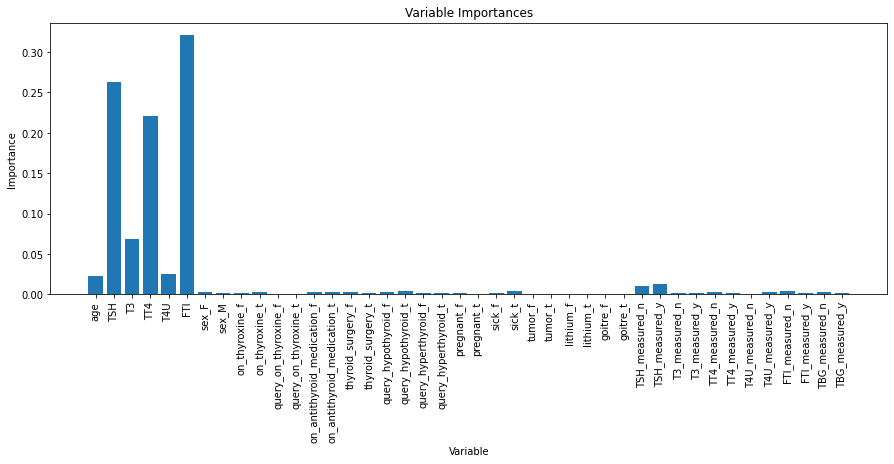

In [147]:
# let's conduct feature importance

f = X.columns.tolist()

Importances_Class(X_train, X_test, y_train, y_test, f, n=100, depth=5, split=2)

> FTI has the highest importance.

In [148]:
# let's predict the model

estimators = 100

depth = 5

split = 2

Random_Forest_Classifier(X_train, X_test, y_train, y_test, estimators, depth, split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        27
           1       0.96      1.00      0.98       595

    accuracy                           0.96       622
   macro avg       0.48      0.50      0.49       622
weighted avg       0.92      0.96      0.94       622


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [149]:
# prediction for the feature with the highest importance

X1 = Hypothyroid[['TSH', 'FTI']]

# train test splits

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y, test_size=0.2, random_state=0)

# prediction

estimators = 100

Random_Forest_Classifier(X1_train, X1_test, y1_train, y1_test, estimators)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.99      0.99      0.99       595

    accuracy                           0.99       622
   macro avg       0.92      0.90      0.91       622
weighted avg       0.99      0.99      0.99       622


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [150]:
# for classification

estimators = 100

depth = 5

split = 2

Random_Forest_Classifier(X1_train, X1_test, y1_train, y1_test, estimators, depth=depth,
              split=split)

Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.85      0.81      0.83        27
           1       0.99      0.99      0.99       595

    accuracy                           0.99       622
   macro avg       0.92      0.90      0.91       622
weighted avg       0.99      0.99      0.99       622


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



> Our accuracy is 99%.

> The model is not subject to overfitting.

> There is high unequality that favours the absence of hypothyroidism. Conducting a feature importance test doesn't affect the model's importance, we conclude that the first set will be used to reduce model complexity as it has the most important features.

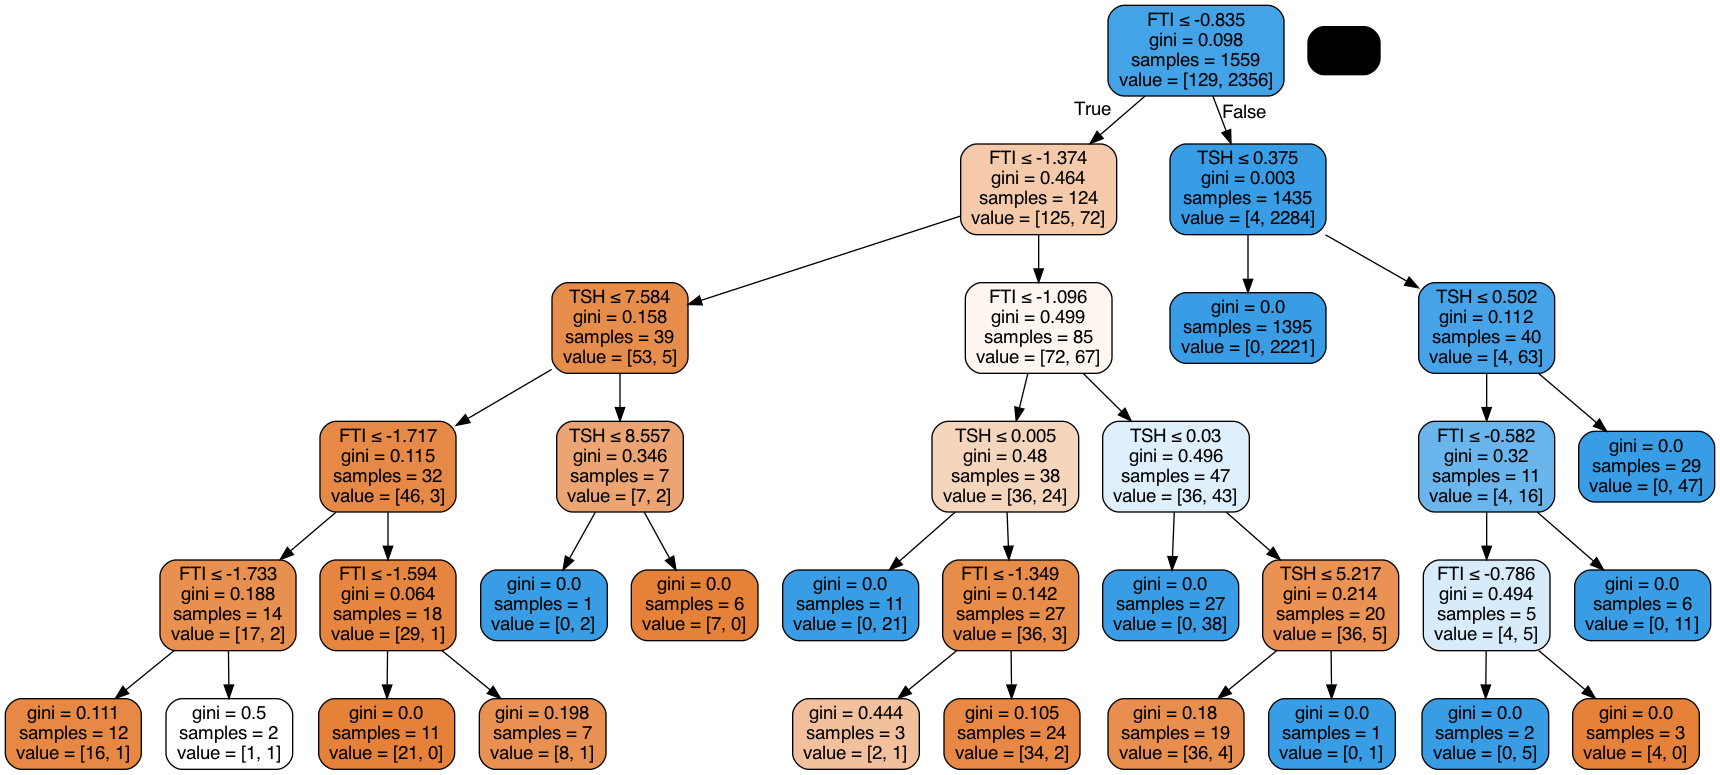

In [153]:
# let's visualize the tree

f = X1.columns.tolist()

Visualize_Class(X1_train, X1_test, y1_train, y1_test, f, 'Thyroidism', depth=5, split=2, n=100)


In [155]:
###############################
#### Hyperparameter Tuning ####
###############################

# let's conduct random forest regressor without lda

def Random_Search(X, y, params, folds):

  scaler = StandardScaler()

  X = scaler.fit_transform(X)

  model = RandomForestClassifier()

  rs_model = RandomizedSearchCV(estimator=model, param_distributions=params, n_iter=100, scoring='f1', cv=folds, verbose=1)
  
  rs_model.fit(X, y)
  
  print(f'The best parameters are: {rs_model.best_params_}')
  
  print(f'Our best scores are: {rs_model.best_score_}')


# hyperparameter tuning to the random search

random_forest_params = {"n_estimators": [10, 100, 200, 500, 1000, 1200],
             "max_depth": [None, 5, 10, 20, 30],
             "max_features": ["auto", "sqrt"],
             "min_samples_split": [2, 4, 6],
             "min_samples_leaf": [1, 2, 4]}


In [156]:
# let's conduct hyper parameter tuning

Random_Search(X1, y, random_forest_params, 10)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
The best parameters are: {'n_estimators': 100, 'min_samples_split': 4, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 5}
Our best scores are: 0.9954440278849732


In [169]:
# let's implement the selected hyperparameters

estimators = 10

split = 2

leaf = 4

maxf = 'sqrt'

depth = 5

Random_Forest_Classifier(X1_train, X1_test, y1_train, y1_test, leaf, maxf, estimators, depth, split)


Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.77      0.89      0.83        27
           1       0.99      0.99      0.99       595

    accuracy                           0.98       622
   macro avg       0.88      0.94      0.91       622
weighted avg       0.99      0.98      0.98       622


Predictions
----------------------------------------------------------------------

   Actual  Predicted
0       1          1
1       1          1
2       1          1
3       1          1
4       1          1 



In [227]:
############################################
#### let's perform Gradient Boosting #######
############################################

# let's create a function to help in gradient boosting

def Gradient_Boost(X_train, X_test, y_train, y_test, n, lrate, depth=None, split=2):

  X_train, X_test = scaling(X_train, X_test)

  gb = GradientBoostingClassifier(
      n_estimators=n, learning_rate=lrate, max_depth=depth)

  gb = gb.fit(X_train, y_train)

  y_pred_gb = gb.predict(X_test)

  report = classification_report(y_test, y_pred_gb)

  print('Classification Report')

  print(f'{"-"*70}\n')

  print(report)


# function without lda

def Random_Search_Gradient_Boost(X, y, params, folds):

  scaler = StandardScaler()

  X = scaler.fit_transform(X)

  model = GradientBoostingClassifier()

  rs_model = RandomizedSearchCV(
      estimator=model, param_distributions=params, n_iter=100, scoring='f1', cv=folds, verbose=1)

  rs_model.fit(X, y)

  print(f'Best parameters: {rs_model.best_params_}')

  print(f'Best scores: {rs_model.best_score_}')



# function for feature importance

def F_importance(X_train, X_test, y_train, y_test, f, n, lrate=0.1,  depth=None, split=2):

  X_train, X_test = scaling(X_train, X_test)

  gb = GradientBoostingClassifier(
      n_estimators=n, learning_rate=lrate, max_depth=depth)

  gb = gb.fit(X_train, y_train)

  y_pred_gb = gb.predict(X_test)

  importances = gb.feature_importances_

  feat = []

  imp = []

  df = pd.DataFrame()

  for feature, importance in zip(f, importances):

    feat.append(feature)

    imp.append(importance)

  df['features'] = feat

  df['importance'] = imp

  df.sort_values('importance', ascending=False, inplace=True)

  values = range(len(imp))

  fig, ax = plt.subplots(figsize=(15, 5))

  plt.bar(feat, imp, orientation='vertical')

  plt.xticks(values, f, rotation='vertical')

  plt.ylabel('Importance')

  plt.xlabel('Variable')

  plt.title('Variable Importances')


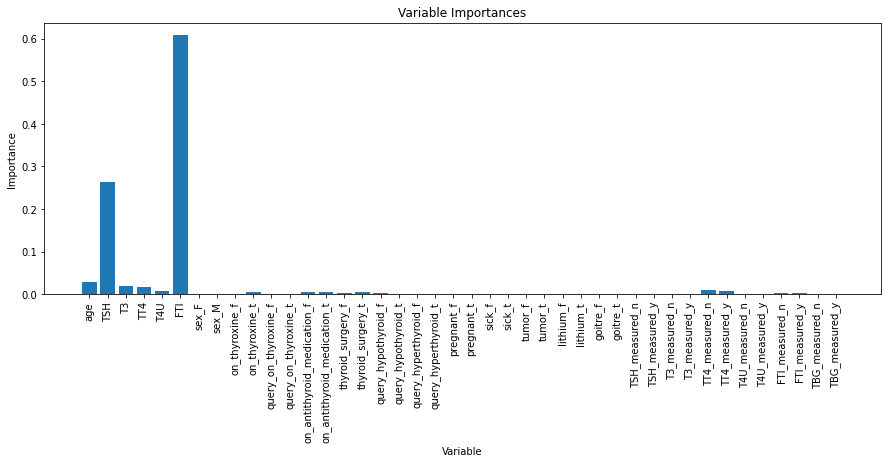

In [220]:
# Gradient Bppsting Feature Importance
n = 300
lrate = 0.1
depth = 5
split = 2
f = X.columns.tolist()
Importances_Class(X_train, X_test, y_train, y_test, f, n, lrate,  depth, split)


> FTI and TSH will form the training set as they have higher feature importance index and the results are similar to that from random forest classifier.

In [223]:
####### Let's fit our model and make our predictions #######
############################################################

estimators = 300
lrate = 0.1
depth = 5
split = 2

Gradient_Boost(X1_train, X1_test, y1_train, y1_test, estimators, lrate, depth, split)


Classification Report
----------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.71      0.81      0.76        27
           1       0.99      0.98      0.99       595

    accuracy                           0.98       622
   macro avg       0.85      0.90      0.87       622
weighted avg       0.98      0.98      0.98       622



In [226]:
# Hyperparameter tuning

gb_params = {'n_estimators': [10, 100, 200, 500, 1000, 1200],
             'learning_rate': np.arange(0.1, 1.1, 0.1),
             'max_depth': [None, 5, 10, 20, 30],
             'max_features': ['auto', 'sqrt', 'log2'],
             'min_samples_split': [2, 4, 6],
             'min_samples_leaf': np.arange(2, 33, 2)}

In [ ]:
Random_Search_Gradient_Boost(X, y, gb_params, 10)

In [247]:
#######################################
######## ----> SVM <------- ###########
#######################################

# getting our x and y

X = Hypothyroid.drop(['status'], axis=1)

y = Hypothyroid['status']

features = X.columns

# train test splits with 70% of data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

forest = RandomForestClassifier(n_estimators=100)

forest = forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

tree = forest.estimators_[50]

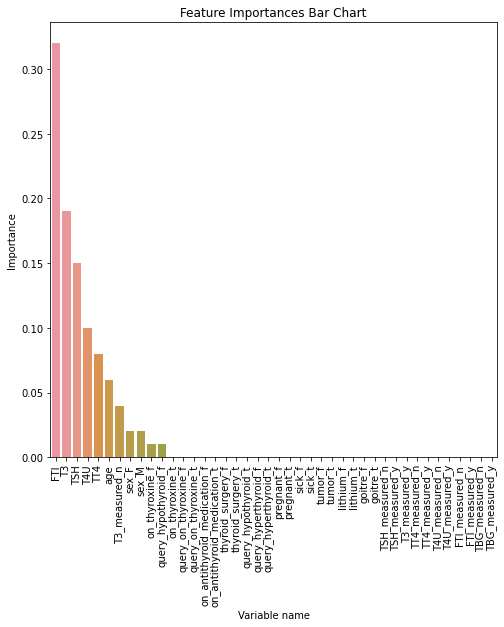

In [250]:
# feature importance
importance = tree.feature_importances_

feature_importances = [(feature, round(importance, 2)) for feature, importance
                       in zip(features, importance)]

feature_importances = sorted(feature_importances, key=lambda x: x[1],
                             reverse=True)
feature_importances

# plotting feature importance

x_value = pd.DataFrame(feature_importances)

x_value

plt.figure(figsize=(8, 8))

sns.barplot(x=0, y=1, data=x_value)

plt.xlabel('Variable name')

plt.xticks(rotation='vertical')

plt.ylabel('Importance')

plt.title('Feature Importances Bar Chart')

plt.show()


> TSH is of more importance when it comes to hypothyroidism

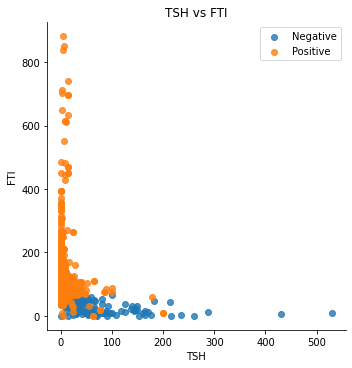

In [252]:
# let's visualize tsh and FTI

sns.lmplot(x='TSH', y='FTI', data=Hypothyroid,
           fit_reg=False, hue='status', legend=False)
           
plt.legend(loc='upper right', labels=['Negative', 'Positive'])

plt.title('TSH vs FTI')

plt.xlabel('TSH')

plt.ylabel('FTI')


plt.show()


In [254]:
Hypothyroid.columns

Index(['status', 'age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI', 'sex_F', 'sex_M',
       'on_thyroxine_f', 'on_thyroxine_t', 'query_on_thyroxine_f',
       'query_on_thyroxine_t', 'on_antithyroid_medication_f',
       'on_antithyroid_medication_t', 'thyroid_surgery_f', 'thyroid_surgery_t',
       'query_hypothyroid_f', 'query_hypothyroid_t', 'query_hyperthyroid_f',
       'query_hyperthyroid_t', 'pregnant_f', 'pregnant_t', 'sick_f', 'sick_t',
       'tumor_f', 'tumor_t', 'lithium_f', 'lithium_t', 'goitre_f', 'goitre_t',
       'TSH_measured_n', 'TSH_measured_y', 'T3_measured_n', 'T3_measured_y',
       'TT4_measured_n', 'TT4_measured_y', 'T4U_measured_n', 'T4U_measured_y',
       'FTI_measured_n', 'FTI_measured_y', 'TBG_measured_n', 'TBG_measured_y'],
      dtype='object')

In [260]:
##### linear kernel #####

from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

X = Hypothyroid[['FTI', 'T4U', 'on_antithyroid_medication_f',
                 'on_antithyroid_medication_t', 'T3', 'age']]

y = Hypothyroid['status']

# let's standardize the data

scaler = StandardScaler()

scaler.fit_transform(X)

# normalizing the data

X = preprocessing.normalize(X)

# train and test splits

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

# let's fit the model into the data

model = SVC(kernel='linear')

linear_model = model.fit(X_train, y_train)

# making the prediction

y_pred = linear_model.predict(X_test)

# let's evaluate the model

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred) )


Confusion matrix: 
 [[ 20  22]
 [  4 887]]
              precision    recall  f1-score   support

           0       0.83      0.48      0.61        42
           1       0.98      1.00      0.99       891

    accuracy                           0.97       933
   macro avg       0.90      0.74      0.80       933
weighted avg       0.97      0.97      0.97       933



In [262]:
###### using polynomial kernel #####

scaler = StandardScaler()

scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

# building the model

polynomial = SVC(kernel='poly', degree=3, gamma='scale')

# training our model

polynomial.fit(X_train, y_train)

# making the prediction

y_pred = polynomial.predict(X_test)

# evaluating the model

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred) )

Confusion matrix: 
 [[ 14  13]
 [  3 592]]
              precision    recall  f1-score   support

           0       0.82      0.52      0.64        27
           1       0.98      0.99      0.99       595

    accuracy                           0.97       622
   macro avg       0.90      0.76      0.81       622
weighted avg       0.97      0.97      0.97       622



> Accuracy is at 97%.

In [265]:
###### using rbf kernel #####

# building the model

rbf_ = SVC(kernel='rbf', gamma='auto', C=1)

# training our model

rbf_ = rbf_.fit(X_train, y_train)

rbf_

# making the prediction

y_pred_rbf = rbf_.predict(X_test)

comparison_frame = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rbf})

comparison_frame.describe()

,Actual,Predicted
count,622.000000,622.000000
mean,0.956592,0.975884
std,0.203939,0.153532
min,0.000000,0.000000
25%,1.000000,1.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


In [266]:
# evaluating the model

print('Confusion matrix: \n', confusion_matrix(y_test, y_pred_rbf))
print( classification_report(y_test, y_pred_rbf) )

Confusion matrix: 
 [[ 12  15]
 [  3 592]]
              precision    recall  f1-score   support

           0       0.80      0.44      0.57        27
           1       0.98      0.99      0.99       595

    accuracy                           0.97       622
   macro avg       0.89      0.72      0.78       622
weighted avg       0.97      0.97      0.97       622



> Accuracy is 97%, thus this is a good model.

In [270]:
##### svm model comparison #####
X = Hypothyroid[['TSH', 'FTI', 'on_antithyroid_medication_t',
                      'on_antithyroid_medication_f', 'T3', 'age']]
y = Hypothyroid['status']


scaler = StandardScaler()

scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

degree = [1, 2, 3, 4, 5]

for d in degree:
    poly = SVC(kernel='poly', degree=d, gamma='scale')
    poly.fit(X_train, y_train)

    print('Polynomial kernel degree: ', d)
    print('Accuracy (training): ', poly.score(X_train, y_train))
    print('Accuracy (test): ', poly.score(X_test, y_test))

Polynomial kernel degree:  1
Accuracy (training):  0.9810865191146881
Accuracy (test):  0.977491961414791
Polynomial kernel degree:  2
Accuracy (training):  0.9830985915492958
Accuracy (test):  0.977491961414791
Polynomial kernel degree:  3
Accuracy (training):  0.9822937625754528
Accuracy (test):  0.977491961414791
Polynomial kernel degree:  4
Accuracy (training):  0.9682092555331991
Accuracy (test):  0.9742765273311897
Polynomial kernel degree:  5
Accuracy (training):  0.9609657947686117
Accuracy (test):  0.9630225080385852


> The model performswell with increase of degree value at C value of 4.

### 7. Conclusion

> Our dataset has an imbalance as there are more females than males. We were still able to make good and accurate predictions while avoiding overfitting.

### 8. Follow up Questions

##### a) Did we have the right data?

> Yes we had the right data

##### b) Do we need other data to answer the research question?


> Yes we need a more gender balanced data to make more realistic predictions

##### c) Did we have the right question?


> Yes the research question was correct.